### Week 1 Discussion Part 2: "Titanic: Machine Learning Through Disaster" 
Lupe Rodriguez 
MSDS 422- Spring 2021

In [75]:
#Set your working directory folder where your train.csv data is located
cd /Users/luperodriguez/Downloads

/Users/luperodriguez/Downloads


In [11]:
#Open the Titanic training dataset using pandas
import pandas as pd 
titanic=pd.read_csv('train.csv')

In [16]:
#Get the top 5 rows of the dataset
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [18]:
#Generate some decriptive statistical information about the data set
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


From this we can tell the average number of passangers were ~29-30 years old, most coming from second class and have a 38% survival rate. 

In [19]:
#Now I am interested to learn more about the kinds of features 'columns' in this dataset to start exploring
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Here we can see that there a total of 12 features that we can explore and analyze.
We can start off with something simple like getting information on how many passangers survived.

In [ ]:
#Lets import seaborn and matplotlib to visualize the data 
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

Text(0.5, 1.0, 'Passanger Survival (1 = Survived, 0 = Died)')

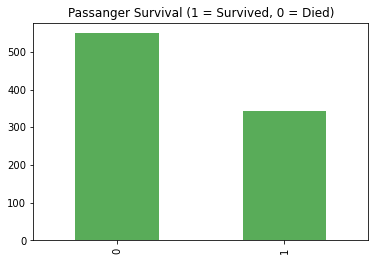

In [69]:
#Plot a bar graph of the value counts from the 'Survived' column
plt.figure(figsize=(6,4))
titanic.Survived.value_counts().plot(kind='bar', color="green", alpha=.65)
plt.title("Passanger Survival (1 = Survived, 0 = Died)")

In [71]:
titanic.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

When getting the value counts for the column 'Survived' our output returns 549 did not survive and 342 did survive. 

Text(0.5, 1.0, 'Class Distribution On The Titanic')

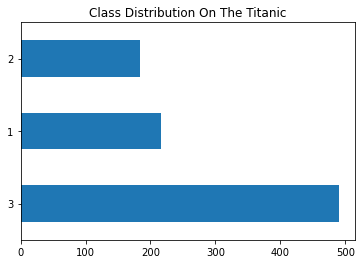

In [77]:
alpha=alpha_scatterplot = 0.2

#color for chart 0-1
color_bar_chart = 1

#We want a horizontal bar graph "barh" for better visualization
titanic.Pclass.value_counts().plot(kind="barh", alpha=color_bar_chart)
plt.title("Class Distribution On The Titanic")

From this graph we can see that those in the 3rd class had the largest distribution out of the 3 classes. 

In [74]:
titanic.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

Text(0.5, 1.0, 'Survival Based On Class')

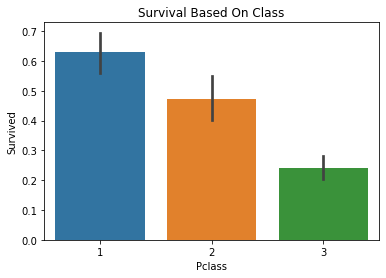

In [98]:
#Now that we have an idea of the class distribution let's determine how many survived in each class
sns.barplot(x='Pclass', y='Survived', data=titanic)
plt.title("Survival Based On Class")

The graph shows that passangers in first class had a best survival rate whereas passangers in the third class had the worst survival rate.

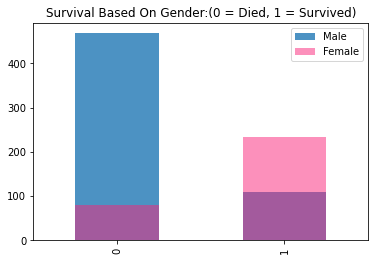

In [96]:
#Let's look at a different feature in the dataset: Gender

titanic_male = titanic.Survived[titanic.Sex == 'male'].value_counts().sort_index()
titanic_female = titanic.Survived[titanic.Sex == 'female'].value_counts().sort_index()

titanic_male.plot(kind='bar',label='Male', alpha=.8)
titanic_female.plot(kind='bar', color='#FA2379',label='Female', alpha=.5)
plt.title("Survival Based On Gender:(0 = Died, 1 = Survived)"); plt.legend(loc='best')


In [94]:
titanic_male

0    468
1    109
Name: Survived, dtype: int64

On the graph we can see that 468 males died (blue) on the "0" bar and 109 male survived (purple shade) on the "1" bar

In [97]:
titanic_female

0     81
1    233
Name: Survived, dtype: int64

On the graph we can see that 81 females died (purple shade) on the "0" bar and 233 females survived (pink shade) on the "1" bar. This shows that females had a better survival rate than males. 